In [1]:
# importing libraries

import pandas as pd
import numpy as np

**Data loading**

In [2]:
data=pd.read_csv('/content/mobile_price_classification.csv')
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
data.isna()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.price_range.unique()

array([1, 2, 3, 0])

In [13]:
data.shape

(2000, 21)

Preprocessing

In [14]:
#scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data['battery_power'] = sc.fit_transform(data[['battery_power']])
data['clock_speed'] = sc.fit_transform(data[['clock_speed']])
data['int_memory'] = sc.fit_transform(data[['int_memory']])
data['mobile_wt'] = sc.fit_transform(data[['mobile_wt']])
data['px_height'] = sc.fit_transform(data[['px_height']])
data['px_width'] = sc.fit_transform(data[['px_width']])
data['ram'] = sc.fit_transform(data[['ram']])

In [15]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,1,0,0.080645,0.6,0.900000,2,...,0.010204,0.170895,0.612774,9,7,19,0,0,1,1
1,0.347361,1,0.00,1,0,1,0.822581,0.7,0.466667,3,...,0.461735,0.993324,0.634687,17,3,7,1,1,0,2
2,0.041416,1,0.00,1,2,1,0.629032,0.9,0.541667,5,...,0.644388,0.811749,0.627205,11,2,9,1,1,0,2
3,0.076152,1,0.80,0,0,0,0.129032,0.8,0.425000,6,...,0.620408,0.858478,0.671566,16,8,11,1,0,0,2
4,0.881764,1,0.28,0,13,1,0.677419,0.6,0.508333,2,...,0.616327,0.475300,0.308658,8,2,15,1,1,0,1


In [16]:
#data and label
x= data.drop('price_range',axis=1)
y=data.price_range

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [22]:
x_train.shape

(1500, 20)

ANN Model Building

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=150)

Epoch 1/150
47/47 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.8347
Epoch 2/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.8400
Epoch 3/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8407
Epoch 4/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8380
Epoch 5/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.8413
Epoch 6/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.8433
Epoch 7/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8393
Epoch 8/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8400
Epoch 9/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8467
Epoch 10/150
47/47 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8447
Epoch 11/

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


**accuracy=93.67**

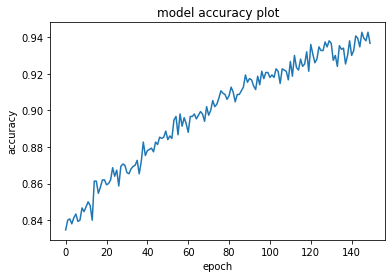

In [32]:
# model accuracy plot


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


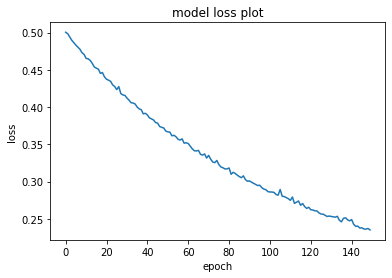

In [33]:
# loss plot

plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
